# Von head() zu .head(): R Code nach Pandas übersetzen

Wenn es um die Reinigung und Analyse von Datensätzen geht, wird die Python Programmbibliothek Pandas in Kombination mit Matplotlib oder Seaborn für die Visualisierung oft als Alternative für R gehandelt. Der Vergleich hinkt, handelt es sich bei R doch um eine komplette Programmiersprache, bei Pandas "nur" um ein, wenn auch sehr umfangreiches, Modul im großen Ökosystem der Programmiersprache Python. Nicht von der Hand zu weisen ist, dass das von Hadley Wickham für R entwickelte tidyverse, eine Zusammenstellung von R Paketen zur Datenanalyse und Visualisierung, einen großen Einfluss auf die Weiterentwicklung und Benjutzerfreundlichkeit von Pandas ausgeübt hat, gerade was die Prinzipien der Datenreinigung ("tidy data") und die einfache und zeitsparende Bedienung ("method chaining") angeht. 

Dieses Tutorial richtet sich besonders an aufgeschlossene Nutzer, die mithilfe konkreten Codes mehr über die Gemeinsamkeiten des tidyverse und Pandas erfahren und mehr über die Übersetzung zwischen beiden Modulen lernen möchten. Als beispielshafter Datensatz soll der aus dem R "Tidy Tuesday"-Projekt stammende Datensatz horror movie ratings dienen. Beim Vorgehen in der Datenanalyse orientieren wir uns mit unseren Fragen zu den Daten im Code beispielhaft an einer Koryphäre des tidyverse, David Robinson, der im Rahmen des Tidy Tuesday Videos und Codebeispiele veröffentlicht.

https://github.com/rfordatascience/tidytuesday
https://www.youtube.com/watch?v=yFRSTlk3kRQ


## Modulimport und Einlesen des Datensatzes

Zunächst importieren wir die notwendigen Module. Werfen wir einen Blick auf den R-Code.

#R Code

```{r}
library(tidyverse)

horror_movies_raw <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv")
```

Das Einlesen des Datensatzes geschieht in Pandas ganz ähnlich wie in der R Programmiersprache über eine Variablenzuweisung. Wir lesen den Datensatz über eine Funktion und ordnen dem Ergebnis die Variable ``horror_movie_ratings`` zu. Pandas besitzt die Fähigkeit den ausgewählten Datensatz über eine Webadresse einzulesen. Dabei ist darauf zu achten, bei einer Datensatz auf github immer die sog. "raw"-Datei, also den Rohdatensatz zu verlinken. Wir lesen die URL ein und lassen uns gleich die ersten Zeilen des Datensatzes anzeigen.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv"

horror_movies_raw = pd.read_csv(url) #Einlesen des Datensatzes über pd.read_csv()

## Ein erster Blick auf den Datenstatz: Die Basics in R und Pandas

Eigentlich jede Datenanalyse beginnt mit einem Blick der ersten Zeilen des Datensatzes mithilfe der Funktion ``head``. Die gleichzeitige Ähnlichkeit des R- und Pandas-Codes ist sowohl hilfreich als auch irritierend, schnell neigt der sich in beiden Sprachen sich heimisch fühlende Nutzer zur Verwendung der jeweils anderen Funktion.

#R Code

```{r}
head(horror_movies_raw)
```

In [17]:
#Python Code

horror_movies_raw.head()

,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


## Werte sortieren: arrange() und sort_values()

**Was ist der bestbewerteste Horrofilm in unserem Datensatz?**

#R Code

```{r}
horror_movies <- horror_movies_raw %>%
  arrange(desc(review_rating)) %>%
```

Um den Film mit der höchsten Bewertung zu erhalten, müssen wir den Datensatz mithilfe der Spalte ``review_rating`` sortieren. R nutzt dazu die Funktion "arrange", auff Deutsch anordnen. In Pandas hingegen nutzen wir dazu die Methode ``.sort_vallues``. Über den Parameter ``ascending=bool`` können wir steuern, wie die Werte sortiert werden sollen, in unserem Fall ``ascending=False``, also nach absteigend. 

In [7]:
#Python Code

horror_movies = horror_movies_raw \                #Dank des XXX läßt sich Python-Code auf mehrere Zeilen verteilen
    .sort_values("review_rating", ascending=False)

horror_movies[['title', 'review_rating']]          #Anzeigen der Spalten 'title' und 'review_rating'

,title,review_rating
2569,Bonehill Road (2017),9.8
3314,The Carmilla Movie (2017),9.6
1961,The Theta Girl (2017),9.6
1980,Flesh of the Void (2017),9.5
1855,Hotel Inferno 2: The Cathedral of Pain (2017),9.5
...,...,...
2857,Wildling (2017),NaN
2891,Alpha Delta Zatan (2017),NaN
2894,Totem (2017),NaN
3113,Patient Zero (2017),NaN


Um den jeweils höchsten Wert einer Spalte abzurufen, stellt Pandas sogar eine noch praktischere Methode ``.idxmax()`` bereit. Der bestbewerteste Film des Datensatze lautet "Bonehill Road".

In [79]:
horror_movies.loc[horror_movies['review_rating'].idxmax()]

title                                             Bonehill Road (2017)
genres                                                          Horror
release_date                                                 27-Oct-17
release_country                                                    USA
movie_rating                                                       NaN
review_rating                                                      9.8
movie_run_time                                                     NaN
plot                 Directed by Todd Sheets. With Andrew Baltes, C...
cast                 Andrew Baltes|Clinton Baysinger|Logan Boese|Aa...
language                                                       English
filming_locations                                                  NaN
budget                                                             NaN
Name: 2569, dtype: object

## Extraktion von Werten aus Spalten/Zeilen: extract() und str.extract()

**Wie lautet die zeitliche Verteilung (Distribution) der Filme?**

Aus welchem Jahr stammen die Horror-Filme des Datensatzes? Blicken wir in die erste Zeile.

In [11]:
horror_movies.iloc[0:1, :]

,title,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget
2569,Bonehill Road (2017),Horror,27-Oct-17,USA,NaN,9.8,NaN,"Directed by Todd Sheets. With Andrew Baltes, C...",Andrew Baltes|Clinton Baysinger|Logan Boese|Aa...,English,NaN,NaN


Schon auf den ersten Blick wird deutlich, dass wir bei der Beantwortung dieser Frage auf ein Problem stoßen: Wie kann man die Jahresverteilung der Filme zeigen, wenn keine eigene Spalte für das Veröffentlichungsdatum besteht? Die Spalte ``release_date`` ist unzuverlässig, . Die Lösung liegt aus der Extration des Jahres aus der Spalte ``title``. Blicken wir auf den R Code.

In [12]:
horror_movies_raw.

Hier wird es interessant, denn das Erscheinungsjahr ist nicht in einer einzelnen Spalte zu finden, sondern ist ein Teil des Objekt-Typs (hier: string) in der Spalte ``title``, wir bereits in den ersten Einträge der Spalte sehen können.

SyntaxError: invalid syntax (<ipython-input-12-048b132c213d>, line 1)



```{r}
horror_movies <- horror_movies_raw %>%
  extract(title, "year", "\\((\\d\\d\\d\\d)\\)$", remove = FALSE, convert = TRUE)
```

Um das Jahr aus dem Titel zu extrahieren, existiert in R die Funktion ``extract``. Da es sich bei den Werten in der Spalte ``title`` um strings, also Text handelt, können wir auf Pandas reichhaltiges Arsenal an string-Operationen zurück greifen und mithilfe von regular expressions das Jahr aus dem string extrahieren. 

In [81]:
horror_movies = horror_movies \
    .assign(release_year=lambda x: x['title'].str.extract('\(\s*\+?(-?\d+)\s*\)')) 

horror_movies.release_year.dtypes

dtype('O')

Achtung, alles was wir bis jetzt getan haben ist aus der Spalte ``title`` die Jahreswerte zu extrahieren und in der neuen Spalte ``release_year`` zuzuweisen. 

Es handelt sich noch immer um den Pandas Objekttyp, was ein Sortieren nach Jahr verkompliziert. Um das zu erreichen, müssen wir die Spalte ``release_year`` in ein Datetime-Objekt verwandeln.

In [82]:
horror_movies = horror_movies \
    .assign(release_year=lambda x: x['title'].str.extract('\(\s*\+?(-?\d+)\s*\)')) \
    .assign(release_year=lambda x: pd.to_numeric(x['release_year']))

horror_movies.release_year.dtypes

dtype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D462DC8>]],
      dtype=object)

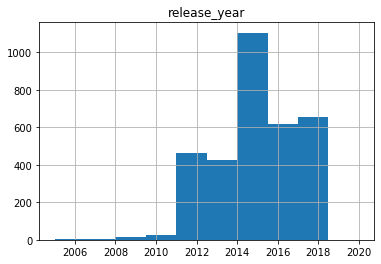

In [83]:
horror_movies.hist(column='release_year', bins=10, range=[2005,2020])

In [84]:
horror_movies = horror_movies \
    .assign(release_year=lambda x: x['title'].str.extract('\(\s*\+?(-?\d+)\s*\)')) \
    .assign(release_year=lambda x: pd.to_numeric(x['release_year']))               \
    #.hist(column='release_year', bins=10, range=[2005, 2020])


In [85]:
#horror_movies.groupby('release_date')['population'].sum().sort_values(ascending=False).plot(kind='bar')

**3. Wie viele Genres sind im Datensatz abgebildet?"**

In [86]:
horror_movies['genres'].value_counts()

Horror                                                  1059
Horror| Thriller                                         474
Comedy| Horror                                           245
Horror| Mystery| Thriller                                172
Drama| Horror| Thriller                                  161
                                                        ... 
Comedy| Fantasy| Horror| Mystery                           1
Comedy| Drama| Fantasy| Horror| Thriller                   1
Drama| Fantasy| Horror| Music| Romance| Thriller           1
Horror| Mystery| Thriller| Western                         1
Biography| Drama| History| Horror| Mystery| Thriller       1
Name: genres, Length: 261, dtype: int64

In [87]:
horror_movies['language'].value_counts()

English                        2421
Spanish                          96
Japanese                         77
Hindi                            37
Filipino|Tagalog                 34
                               ... 
Flemish|French|Dutch              1
Mandarin|Japanese                 1
Portuguese|Japanese|Guarani       1
Italian|Slovenian                 1
Vietnamese|English                1
Name: language, Length: 187, dtype: int64

In [88]:
horror_movies['budget'].value_counts().tail(50)

$360,000           1
£148,000           1
AUD 800,000        1
BRL 1,500,000      1
INR 50,000,000     1
CAD 31             1
€1,254,470         1
$9,500             1
£4,500             1
€3,500,000         1
€850               1
£500               1
$39,000,000        1
AUD 20,000         1
$1,300             1
$55,000,000        1
CNY 32,000,000     1
NOK 35,000,000     1
INR 100,000,000    1
SEK 300,000        1
BRL 5,000          1
$190,000,000       1
£2,500,000         1
€14,000,000        1
£6,300,000         1
$7,500,000         1
$2,100,000         1
$43,000            1
MXN 26,040,000     1
AUD 1,300,000      1
€50,000            1
DKK 2,100,000      1
€7,000,000         1
CAD 100,000        1
$85,000,000        1
RUR 107            1
$53,000            1
$17,000            1
MXN 12,500,000     1
$97,000,000        1
RUR 1,000,000      1
£4,000             1
€2,800,000         1
£65,000            1
£316,000           1
PHP 26,000,000     1
SGD 1,100,000      1
CAD 3,000,000

In [96]:
horror_movies = horror_movies \
    .assign(release_year=lambda x: x['title'].str.extract('\(\s*\+?(-?\d+)\s*\)')) \
    .assign(release_year=lambda x: pd.to_numeric(x['release_year']))               \
    .assign(budget=lambda x: x['budget'].str.split('£',' '))                      
    #.assign(budget=lambda x: pd.to_numeric(x['budget']))

AttributeError: Can only use .str accessor with string values!

In [90]:
horror_movies = horror_movies \
    .assign(release_year=lambda x: x['title'].str.extract('\(\s*\+?(-?\d+)\s*\)')) \
    .assign(release_year=lambda x: pd.to_numeric(x['release_year']))               \
    .assign(budget=lambda x: x['budget'].str.replace(',',''))                      
    


#.assign(budget=lambda x: x['budget'].dropna().str.extract('(\d+)').astype(float)) #dropna

In [93]:
ID = pd.to_numeric(["13", "a40", "9.0"], errors='coerce')
ID

array([13., nan,  9.])

In [99]:
import re
string = "Hello>>>World!!!!2]]splitting"
re.split(r'(>+|!+|]+)', string)

['Hello', '>>>', 'World', '!!!!', '2', ']]', 'splitting']

In [102]:
string = "RUR 1000000"     

re.split(r'(\W+), string))

SyntaxError: EOL while scanning string literal (<ipython-input-102-2499c56c58fc>, line 3)

In [108]:
re.split(r'\W+', '£4000') #Lösung

['', '4000']

In [109]:
re.split(r'\W+', '£4000')[1] #Lösung

'4000'

In [98]:
horror_movies['budget'].value_counts().head(50)

Series([], Name: budget, dtype: int64)

In [ ]:
j1 = sns.jointplot(data=dataMoviesFull, x='criticRating', y='audienceRating')

In [ ]:
plt.plot(df['date'], df['count'])

In [184]:
horror_movies.plot.hist(by='release_year')

ValueError: view limit minimum 0.5599999999999997 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000000A06E828> (for post_execute):


ValueError: view limit minimum 0.5599999999999997 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.5599999999999997 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [84]:
horror_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 15 columns):
title                3328 non-null object
genres               3327 non-null object
release_date         3328 non-null object
release_country      3328 non-null object
movie_rating         1451 non-null object
review_rating        3076 non-null float64
movie_run_time       2784 non-null object
plot                 3327 non-null object
cast                 3314 non-null object
language             3257 non-null object
filming_locations    2096 non-null object
budget               1234 non-null object
release_year         3327 non-null object
neu                  3327 non-null object
date                 3327 non-null object
dtypes: float64(1), object(14)
memory usage: 390.1+ KB


```{r}
horror_movies <- horror_movies_raw %>%
  arrange(desc(review_rating)) %>%
  extract(title, "year", "\\((\\d\\d\\d\\d)\\)$", remove = FALSE, convert = TRUE) %>%
  mutate(budget = parse_number(budget)) %>%
  separate(plot, c("director", "cast_sentence", "plot"), extra = "merge", sep = "\\. ", fill = "right") %>%
  distinct(title, .keep_all = TRUE)
```

In [14]:
Die Syntax von 

Index(['title', 'genres', 'release_date', 'release_country', 'movie_rating',
       'review_rating', 'movie_run_time', 'plot', 'cast', 'language',
       'filming_locations', 'budget'],
      dtype='object')

In [89]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe 
df = pd.DataFrame({'Date':['11/8/2011', '04/23/2008', '10/2/2019'], 
                'Event':['Music', 'Poetry', 'Theatre'], 
                'Cost':[10000, 5000, 15000]}) 

# convert the 'Date' column to datetime format 
df['Date']= pd.to_datetime(df['Date']) 
  
# Check the format of 'Date' column 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Date     3 non-null datetime64[ns]
Event    3 non-null object
Cost     3 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 200.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Date     3 non-null datetime64[ns]
Event    3 non-null object
Cost     3 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 200.0+ bytes


Wie immer beginnen wir mit einer ersten Gesamtanalayse des Datensatzes. Um einen ersten Eindruck zu gewinnen, bieten sich die Methoden ``.shape``, ``

In [5]:
df.shape

(3328, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
title                3328 non-null object
genres               3327 non-null object
release_date         3328 non-null object
release_country      3328 non-null object
movie_rating         1451 non-null object
review_rating        3076 non-null float64
movie_run_time       2784 non-null object
plot                 3327 non-null object
cast                 3314 non-null object
language             3257 non-null object
filming_locations    2096 non-null object
budget               1234 non-null object
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


In [8]:
df.dtypes

title                object
genres               object
release_date         object
release_country      object
movie_rating         object
                      ...  
plot                 object
cast                 object
language             object
filming_locations    object
budget               object
Length: 12, dtype: object

Zu den ersten Schritten gehört heraus zu finden wie viele NaN, also fehlende Werte ("missing values") der Datensatz aufweist.

Pandas verwendet für fehlende Werte die numpy-Implementierung NaN. NaN steht für Not a Number und kann frei übersetzt als Missing Value bezeichnet werden. Über den Befehl ``isna()`` finden wir die NaN-Werte des Datensatz, dann müssen wir diese nur noch addieren und der Größe nach sortieren, um einen guten Überblick zu behalten. 

In [11]:
df.isna().sum().sort_values()

title                   0
release_date            0
release_country         0
genres                  1
plot                    1
                     ... 
review_rating         252
movie_run_time        544
filming_locations    1232
movie_rating         1877
budget               2094
Length: 12, dtype: int64

Besonders viele fehlende Werte zeigen die Spalten filming_locations, movie_rating und budget.   

In [3]:
df = (df.sort_values(by="title", ascending=False)
       .sort_values(by="review_rating", ascending=False)
       .assign(release_date=lambda x: pd.to_datetime(x['release_date']))
       .assign(release_year=df.title.apply(lambda st: st[st.find("(")+1:st.find(")")]))
       .reindex(columns=['title', 'release_year', 'genres', 'release_date', 'release_country', 'movie_rating','review_rating', 'movie_run_time', 'plot', 'cast', 'language', 'filming_locations', 'budget']))

In [4]:
df.loc[df['release_year'] == "2016"]

,title,release_year,genres,release_date,release_country,movie_rating,review_rating,movie_run_time,plot,cast,language,filming_locations,budget
774,Johann Karlo's Gun Driver (2016),2016,Action| Adventure| Fantasy| Horror| Sci-Fi| We...,2016-09-01,USA,NaN,9.3,52 min,Directed by Johann Karlo. With Curtis Wayne Jo...,Curtis Wayne Johnson II|Megan Hanks|Andres Per...,English,"Tucson, Arizona, USA","$5,000"
1667,Hell Mountain (2016),2016,Horror,2016-01-01,USA,NaN,9.2,92 min,"Directed by Jesse Pomeroy. With Megan Collaso,...",Megan Collaso|Taylor Dooley|Markus Innocenti|C...,English,NaN,NaN
1221,Barrio Tales 2 (2016),2016,Comedy| Horror,2016-01-01,USA,NaN,9.2,80 min,Directed by Jarret Tarnol. With Alexander Agui...,Alexander Aguila|Ronnie Alvarez|Alberto Barros...,English,"Los Angeles, California, USA",NaN
1588,Teniente Gimo (2016),2016,Horror,2016-06-01,Philippines,NaN,9.1,NaN,"Directed by Roland Sanchez, Roland Sanchez. Wi...",John Regala|Kate Brios|Julio Diaz|Mon Confiado...,Filipino|Tagalog|Visayan,NaN,NaN
2257,Family Possessions (2016),2016,Horror,2016-10-21,USA,NaN,9.0,NaN,"Directed by Tommy Faircloth. With Mark Patton,...",Mark Patton|Felissa Rose|Jason Vail|Suzie Hain...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,Dark Entry (2016),2016,Horror,2016-04-20,USA,NOT RATED,NaN,87 min,Directed by Thomas David Dean. With Thomas Dav...,Thomas David Dean|Jessica Anne Barone,English,"Litchfield, Connecticut, USA","$50,000"
1246,Coulrophobia (2016),2016,Horror,2016-01-20,UK,NaN,NaN,85 min,"Directed by Warren Speed. With Pete Bennett, D...",Pete Bennett|Daniella D'Ville|Roxy Bordeaux|Wa...,English,"Rowlands Gill, Durham, England, UK","£50,000"
1344,Bayou Tales (2016),2016,Horror,2016-04-06,USA,NaN,NaN,NaN,"Directed by David DuBos. With Kim Baptiste, Ro...",Kim Baptiste|Roger Bart|Neil Brown Jr.|Ian Cas...,English,"New Orleans, Louisiana, USA","$1,500,000"
868,Aurora (2016),2016,Horror,2016-01-01,Brazil,NaN,NaN,NaN,Directed by José Eduardo Belmonte. With João B...,João Bourbonnais|Humberto Carrão|Juliano Cazar...,Portuguese,NaN,NaN


In [28]:
df = pd.DataFrame({'review_rating': range(3),
                   'title': 'foo(2016) bar(2017) baz(2018)'.split()})
df

,review_rating,title
0,0,foo(2016)
1,1,bar(2017)
2,2,baz(2018)


In [31]:
newly_assigned = df.sort_values("review_rating", ascending=False) \
   .assign(release_year=lambda x: x.title.str.extract('\((.*)\)')) \
   .loc[lambda x: x.release_year == "2016"]

In [32]:
df.sort_values("review_rating", ascending=False) \
   .assign(release_year=lambda x: x.title.str.extract('\((.*)\)')) \
   .loc[lambda x: x.release_year == "2016"]

,review_rating,title,release_year
0,0,foo(2016),2016


In [ ]:
fp = r"C:\Users\tim\Programmieren\Datasets\tidytuesday-master\data\2019\2019-10-22\horror_movies.csv"

df = pd.read_csv(fp)

In [34]:
jobs_gender = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv")
earnings_female = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/earnings_female.csv") 
employed_gender = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/employed_gender.csv") 

In [35]:
employed_gender

,year,total_full_time,total_part_time,full_time_female,part_time_female,full_time_male,part_time_male
0,1968,86.0,14.0,75.1,24.9,92.2,7.8
1,1969,85.5,14.5,74.9,25.1,91.8,8.2
2,1970,84.8,15.2,73.9,26.1,91.5,8.5
3,1971,84.4,15.6,73.2,26.8,91.2,8.8
4,1972,84.3,15.7,73.1,26.9,91.1,8.9
...,...,...,...,...,...,...,...
44,2012,80.6,19.4,73.7,26.3,86.7,13.3
45,2013,80.8,19.2,74.0,26.0,86.9,13.1
46,2014,81.1,18.9,74.2,25.8,87.3,12.7
47,2015,81.6,18.4,74.8,25.2,87.6,12.4


In [36]:
jobs_gender

,year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
0,2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.600000,120254,126142.0,95921.0,76.042080
1,2013,General and operations managers,"Management, Business, and Financial",Management,977284,681627,295657,30.300000,73557,81041.0,60759.0,74.973162
2,2013,Legislators,"Management, Business, and Financial",Management,14815,8375,6440,43.500000,67155,71530.0,65325.0,91.325318
3,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,43015,17775,25240,58.700000,61371,75190.0,55860.0,74.291794
4,2013,Marketing and sales managers,"Management, Business, and Financial",Management,754514,440078,314436,41.700000,78455,91998.0,65040.0,70.697189
...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2016,Pumping station operators,"Production, Transportation, and Material Moving",Material Moving,19540,18917,623,3.188332,62096,62053.0,67083.0,NaN
2084,2016,Refuse and recyclable material collectors,"Production, Transportation, and Material Moving",Material Moving,65170,58851,6319,9.696179,32367,34488.0,24268.0,NaN
2085,2016,Mine shuttle car operators,"Production, Transportation, and Material Moving",Material Moving,732,722,10,1.366120,43866,43808.0,NaN,NaN
2086,2016,"Tank car, truck, and ship loaders","Production, Transportation, and Material Moving",Material Moving,4198,4155,43,1.024297,44079,44487.0,NaN,NaN


In [46]:
jobs_gender['occupation'].value_counts() 

Nurse practitioners                                             4
Automotive body and related repairers                           4
Police and sheriff's patrol officers                            4
Physical therapist assistants and aides                         4
Coin, vending, and amusement machine servicers and repairers    4
                                                               ..
Computer , all other                                            4
Photographers                                                   4
Miscellaneous therapists, including exercise physiologists      4
Agricultural engineers                                          4
Small engine mechanics                                          4
Name: occupation, Length: 522, dtype: int64

In [41]:
jobs_gender.shape

(2088, 12)

In [63]:
import numpy as np

In [68]:
jobs_gender['major_category'].unique().size #wie viele unique values hat die Kategorie

8

In [74]:
jobs_gender.groupby(['year', 'major_category']).groups

{(2013,
  'Computer, Engineering, and Science'): Int64Index([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
              71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
              84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
              97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
             110, 111, 112, 113, 114, 115, 116],
            dtype='int64'),
 (2013,
  'Education, Legal, Community Service, Arts, and Media'): Int64Index([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
             130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
             143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
             156, 157, 158],
            dtype='int64'),
 (2013,
  'Healthcare Practitioners and Technical'): Int64Index([159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
             172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184

In [49]:
jobs_gender.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [50]:
for c in jobs_gender.columns:
    print("---- %s ---" % c)
    print(jobs_gender[c].value_counts())

---- year ---
2015    522
2013    522
2016    522
2014    522
Name: year, dtype: int64
---- occupation ---
Nurse practitioners                                             4
Automotive body and related repairers                           4
Police and sheriff's patrol officers                            4
Physical therapist assistants and aides                         4
Coin, vending, and amusement machine servicers and repairers    4
                                                               ..
Computer , all other                                            4
Photographers                                                   4
Miscellaneous therapists, including exercise physiologists      4
Agricultural engineers                                          4
Small engine mechanics                                          4
Name: occupation, Length: 522, dtype: int64
---- major_category ---
Production, Transportation, and Material Moving         444
Natural Resources, Construction, and Ma

Zusammenfassend lässt sich sagen, dass sich beide Ökosysteme, Python und R, in vielen Bereichen gegenseitig positiv beeinflussen. Eine strikte Trennung beider Sprachen lässt sich heute nicht mehr aufrecht erhalten, dafür sprechen schon die zahlreichen Programme, die in beiden Sprachen zuhause sind, man nehme nur das beide sprachen unterstützende Jupyter Notebook (sie lesen gerade eins!) und das Python-Modul rpy2, das sogar erlaubt Python und R Code in einem Notebook zu mischen. Denn in einem Großteil der Fälle ist es so: Die Nutzung des tidyverse oder Pandas ist weniger eine Frage des Funktionsumfangs, als der der der äußeren Bedingungen und persönlichen Vorlieben. https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html

 und der ``%>%``-Operator. Über ``%>%``
    
    Gleich im ersten Codebeispiel sieht eine der wichtigsten Grundlagen von R, dem Zuweisungsoperator ``<-``. Mit dem Zuweisungsoperator <- kann man Objekten einen Wert zuweisen. 
    
    Befehle “durchpfeifen” - ` %>% ` (dplyr)
Befehle “verknüpfen”, d.h. hintereinander ausführen kann man mit ` %>% . Es lassen sich nicht alle Befehle verknüpfen, sondern nur Befehle, die eine Tabelle als Input und als Output vorsehen. Weil der Operator %>% ` auch “pipe” (Pfeife) genannt wird, nenne ich die Anwendung des Operators auch “durchpfeifen”. Man kann ` %>% ` auf Deutsch übersetzen mit “und dann”.